In [1]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt
from spacy import displacy

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)
displacy.serve(doc, style="dep")

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


c:\users\yuxin\appdata\local\programs\python\python37\lib\site-packages\spacy\displacy\__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



In [2]:
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

In [3]:
def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    # ROOT: A basic word to which affixes (prefixes and suffixes) are added is called a root word because it forms 
    #       the basis of a new word.
    # adj: adjective
    # attr: attribute [定语]
    # agent: noun phrase or pronoun that identifies the person or thing
    # amod: adjectival modifier
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

In [4]:
# def isRelationCandidate(token):
#     deps = ["ROOT", "adj", "attr", "agent", "amod"]
#     # ROOT:  A basic word to which affixes (prefixes and suffixes) are added is called a root word because it forms 
#     #        the basis of a new word.
#     # adj: adjective
#     # attr: attribute [定语]
#     # agent: noun phrase or pronoun that identifies the person or thing
#     # amod: adjectival modifier
#     if token.dep_ in deps:
#         return True
#     else:
#         return False

In [5]:
# def isConstructionCandidate(token):
#     deps = ["compound", "prep", "conj", "mod"]
#     if token.dep_ in deps:
#         return True
#     else:
#         return False

In [6]:
# def isSubjectConstruction(token):
#     deps=['nsubj','nsubjpass','csubj', 'csubjpass']

In [16]:
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        #printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

In [17]:
def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()


In [21]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("We can use them in a safe way")
nlp_model = spacy.load('en_core_web_sm')
triples = processSubjectObjectPairs(doc)
printGraph(triples)

We , use safe , them way


IndexError: string index out of range

London is the capital and largest city of England and the United Kingdom. Standing on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea, London has been a major settlement for two millennia. Londinium was founded by the Romans. The City of London, London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as the Square Mile − retains boundaries that follow closely its medieval limits.The City of Westminster is also an Inner London borough holding city status. Greater London is governed by the Mayor of London and the London Assembly.London is located in the southeast of England.Westminster is located in London.London is the biggest city in Britain. London has a population of 7,172,036.
London , be capital large , England
London , 50-mile be major settlement , Thames east England head estuary Sea millennia
Londinium , found by , Romans
City core that , ancient square retain medieval , London 

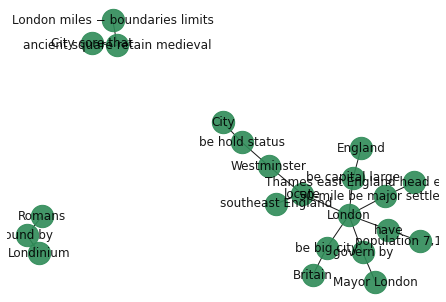

In [19]:
if __name__ == "__main__":

    text = "London is the capital and largest city of England and the United Kingdom. Standing on the River " \
           "Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to " \
           "the North Sea, London has been a major settlement for two millennia. " \
           "Londinium was founded by the Romans. The City of London, " \
           "London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as " \
           "the Square Mile − retains boundaries that follow closely its medieval limits." \
           "The City of Westminster is also an Inner London borough holding city status. " \
           "Greater London is governed by the Mayor of London and the London Assembly." \
           "London is located in the southeast of England." \
           "Westminster is located in London." \
           "London is the biggest city in Britain. London has a population of 7,172,036."

    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    print (text)
    for sentence in sentences:
        triples.append(processSentence(sentence))

    printGraph(triples)